# NFL Games Missed Modeling

## Imports

In [1]:
from src import *

# import

df = pd.read_csv('merged_clean.csv')
df

c:\Users\nick_\anaconda3\envs\foozball\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


,season_x,team_x,status,height,weight,player_id_x,years_exp,game_type_x,entry_year,age,cleaned_name_x,std_pos_x,unique_id,active_games,max_week,missed_games,birth_year,tgt_sh,ay_sh,yac_sh,ry_sh,rtd_sh,rfd_sh,rtdfd_sh,yptmpa,ppr_sh,completions_summed,attempts_summed,passing_yards_summed,passing_tds_summed,interceptions_summed,sacks_summed,sack_yards_summed,sack_fumbles_summed,sack_fumbles_lost_summed,passing_air_yards_summed,passing_first_downs_summed,passing_2pt_conversions_summed,carries_summed,rushing_yards_summed,rushing_tds_summed,rushing_fumbles_summed,rushing_fumbles_lost_summed,rushing_first_downs_summed,rushing_2pt_conversions_summed,receptions_summed,targets_summed,receiving_yards_summed,receiving_tds_summed,receiving_fumbles_summed,receiving_fumbles_lost_summed,receiving_air_yards_summed,receiving_yards_after_catch_summed,receiving_first_downs_summed,receiving_2pt_conversions_summed,special_teams_tds_summed,report_primary_injury,report_status,practice_primary_injury,practice_status,doubt,out,prob,quest,fp,dnp,lp,Hamstring,Knee,Ankle,Groin,Neck,Concussion,Foot,Back,Achilles
0,2009.0,PHI,ACT,70.0,200.0,00-0000108,12.0,WC,1997.0,35.0,David Akers,K,00-0000108_2009_David_Akers_K,18.0,18.0,0.0,1974.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,No Inj,Active,No Inj,Full Participation In Practice,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2010.0,PHI,ACT,70.0,200.0,00-0000108,13.0,WC,1997.0,36.0,David Akers,K,00-0000108_2010_David_Akers_K,18.0,18.0,0.0,1974.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Hamstring,Active,Hamstring,Full Participation in Practice,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2011.0,SF,ACT,70.0,200.0,00-0000108,14.0,CON,1997.0,37.0,David Akers,K,00-0000108_2011_David_Akers_K,20.0,20.0,0.0,1974.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.047313,1.0,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,9.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,No Inj,Active,No Inj,Full Participation In Practice,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2012.0,SF,ACT,70.0,200.0,00-0000108,15.0,SB,1997.0,38.0,David Akers,K,00-0000108_2012_David_Akers_K,21.0,21.0,0.0,1974.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Hip,Probable,Hip,Full Participation in Practice,0.0,0.0,5.0,0.0,4.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2013.0,DET,ACT,70.0,200.0,00-0000108,16.0,REG,1997.0,39.0,David Akers,K,00-0000108_2013_David_Akers_K,17.0,17.0,0.0,1974.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,No Inj,Active,No Inj,Full Participation In Practice,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13494,2024.0,SEA,CUT,67.0,195.0,00-0039940,0.0,REG,2024.0,24.0,Kairee Robinson,RB,00-0039940_2024_Kairee_Robinson_RB,0.0,18.0,18.0,2000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,No Inj,Active,No Inj,Full Participation In Practice,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13495,2024.0,KC,CUT,77.0,240.0,00-0039941,0.0,REG,2024.0,25.0,Geor'Quarius Spivey,TE,00-0039941_2024_Geor'Quarius_Spivey_TE,0.0,22.0,22.0,1999.0,0.0,0.0,0.0,0.0,0.0,0.0,

## Preprocessing

**Create target column - did player miss four or more games the next season(1 class) or did they miss less than four games(0 class)

In [2]:
# Sort by player ID with most recent season at the top of every player group
df = df.sort_values(['player_id_x', 'season_x'], ascending=False)

# Create new column bu shifting missed games down one row. The new column will then show games missed in the next season
df['next_season_missed'] = df.groupby('player_id_x')['missed_games'].shift(1)

# Work check
df

,season_x,team_x,status,height,weight,player_id_x,years_exp,game_type_x,entry_year,age,cleaned_name_x,std_pos_x,unique_id,active_games,max_week,missed_games,birth_year,tgt_sh,ay_sh,yac_sh,ry_sh,rtd_sh,rfd_sh,rtdfd_sh,yptmpa,ppr_sh,completions_summed,attempts_summed,passing_yards_summed,passing_tds_summed,interceptions_summed,sacks_summed,sack_yards_summed,sack_fumbles_summed,sack_fumbles_lost_summed,passing_air_yards_summed,passing_first_downs_summed,passing_2pt_conversions_summed,carries_summed,rushing_yards_summed,rushing_tds_summed,rushing_fumbles_summed,rushing_fumbles_lost_summed,rushing_first_downs_summed,rushing_2pt_conversions_summed,receptions_summed,targets_summed,receiving_yards_summed,receiving_tds_summed,receiving_fumbles_summed,receiving_fumbles_lost_summed,receiving_air_yards_summed,receiving_yards_after_catch_summed,receiving_first_downs_summed,receiving_2pt_conversions_summed,special_teams_tds_summed,report_primary_injury,report_status,practice_primary_injury,practice_status,doubt,out,prob,quest,fp,dnp,lp,Hamstring,Knee,Ankle,Groin,Neck,Concussion,Foot,Back,Achilles,next_season_missed
13498,2024.0,SEA,CUT,78.0,240.0,00-0039952,0.0,REG,2024.0,25.0,Devon Garrison,TE,00-0039952_2024_Devon_Garrison_TE,0.0,18.0,18.0,1999.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,No Inj,Active,No Inj,Full Participation In Practice,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
13497,2024.0,GB,DEV,72.0,205.0,00-0039945,0.0,WC,2024.0,26.0,Alex Hale,K,00-0039945_2024_Alex_Hale_K,0.0,19.0,19.0,1998.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,No Inj,Active,No Inj,Full Participation In Practice,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
13496,2024.0,NO,CUT,76.0,260.0,00-0039942,0.0,REG,2024.0,23.0,Mason Fairchild,TE,00-0039942_2024_Mason_Fairchild_TE,0.0,18.0,18.0,2001.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,No Inj,Active,No Inj,Full Participation In Practice,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
13495,2024.0,KC,CUT,77.0,240.0,00-0039941,0.0,REG,2024.0,25.0,Geor'Quarius Spivey,TE,00-0039941_2024_Geor'Quarius_Spivey_TE,0.0,22.0,22.0,1999.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,No Inj,Active,No Inj,Full Participation In Practice,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
13494,2024.0,SEA,CUT,67.0,195.0,00-0039940,0.0,REG,2024.0,24.0,Kairee Robinson,RB,00-0039940_2024_Kairee_Robinson_RB,0.0,18.0,18.0,2000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,No Inj,Active,No Inj,Full Participation In Practice,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4,2013.0,DET,ACT,70.0,200.0,00-0000108,16.0,REG,1997.0,39.0,David Akers,K,00-0000108_2013_David_Akers_K,17.0,17.0,0.0,1974.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,No Inj,Active,No Inj,Full Participation In Practice,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
3,2012.0,SF,ACT,70.0,200.0,00-0000108,15.0,SB,1997.0,38.0,David Akers,K,00-00001

In [3]:
# Create target column with 1 class being missed four or more games and 0 class being missed less than four games in the next season
df['missed4'] = np.where(df['next_season_missed'] >= 4, 1, 0)

Each player ID should have one na in next season missed due to retirement or not having a next season after 2024 (2025 hasn't been played yet)

In [4]:
# How many NA in next season missed
print(f'missing next season stat - {df["next_season_missed"].isna().sum()}')

# How many number of unique players - number should match NA sum from line above
print(f'number of unique players - {df["player_id_x"].nunique()}')

missing next season stat - 3438
number of unique players - 3438


**Test set will be the latest season possible. This is rows with the 2023 season in season_x, with the next season to predict as 2024. As of today 2024 is the mos recent season played**

In [5]:
# Split train with all seasons less than 2023
train_df = df[df['season_x'] < 2023]

# Split test with only the 2023 season
test_df = df[df['season_x'] == 2023]

# Work check on test
test_df

,season_x,team_x,status,height,weight,player_id_x,years_exp,game_type_x,entry_year,age,cleaned_name_x,std_pos_x,unique_id,active_games,max_week,missed_games,birth_year,tgt_sh,ay_sh,yac_sh,ry_sh,rtd_sh,rfd_sh,rtdfd_sh,yptmpa,ppr_sh,completions_summed,attempts_summed,passing_yards_summed,passing_tds_summed,interceptions_summed,sacks_summed,sack_yards_summed,sack_fumbles_summed,sack_fumbles_lost_summed,passing_air_yards_summed,passing_first_downs_summed,passing_2pt_conversions_summed,carries_summed,rushing_yards_summed,rushing_tds_summed,rushing_fumbles_summed,rushing_fumbles_lost_summed,rushing_first_downs_summed,rushing_2pt_conversions_summed,receptions_summed,targets_summed,receiving_yards_summed,receiving_tds_summed,receiving_fumbles_summed,receiving_fumbles_lost_summed,receiving_air_yards_summed,receiving_yards_after_catch_summed,receiving_first_downs_summed,receiving_2pt_conversions_summed,special_teams_tds_summed,report_primary_injury,report_status,practice_primary_injury,practice_status,doubt,out,prob,quest,fp,dnp,lp,Hamstring,Knee,Ankle,Groin,Neck,Concussion,Foot,Back,Achilles,next_season_missed,missed4
13270,2023.0,SEA,ACT,73.0,220.0,00-0039165,0.0,REG,2023.0,22.0,Zach Charbonnet,RB,00-0039165_2023_Zach_Charbonnet_RB,16.0,18.0,2.0,2001.0,0.072595,-0.010534,0.125506,0.052938,0.000,0.039326,0.035176,0.379310,0.080979,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,108.0,462.0,1.0,0.0,0.0,32.0,0.0,33.0,40.0,209.0,0.0,0.0,0.0,-41.0,248.0,7.0,0.0,0.0,Knee,Questionable,Knee,Full Participation in Practice,0.0,0.0,0.0,2.0,2.0,1.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
13268,2023.0,IND,RES,76.0,232.0,00-0039164,0.0,REG,2023.0,21.0,Anthony Richardson,QB,00-0039164_2023_Anthony_Richardson_QB,4.0,18.0,14.0,2002.0,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.213689,50.0,84.0,577.0,3.0,1.0,7.0,29.0,1.0,0.0,676.0,31.0,2.0,25.0,136.0,4.0,2.0,1.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Concussion,Active,Concussion,Full Participation in Practice,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,5.0,1
13266,2023.0,HOU,ACT,75.0,218.0,00-0039163,0.0,DIV,2023.0,22.0,C.J. Stroud,QB,00-0039163_2023_C.J._Stroud_QB,17.0,20.0,3.0,2001.0,0.001779,-0.000201,0.000491,0.000000,0.000,0.000000,0.000000,0.000000,0.206308,354.0,553.0,4557.0,26.0,5.0,38.0,331.0,6.0,3.0,4908.0,206.0,0.0,43.0,167.0,3.0,2.0,1.0,17.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,-1.0,1.0,0.0,0.0,0.0,Concussion,Active,Concussion,Full Participation in Practice,1.0,0.0,0.0,1.0,3.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,1.0,0
13264,2023.0,TEN,INA,76.0,232.0,00-0039152,0.0,REG,2023.0,24.0,Will Levis,QB,00-0039152_2023_Will_Levis_QB,9.0,18.0,9.0,1999.0,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.159821,149.0,255.0,1808.0,8.0,4.0,28.0,185.0,5.0,2.0,2688.0,81.0,1.0,25.0,57.0,1.0,2.0,2.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Foot,Questionable,Foot,Limited Participation in Practice,0.0,0.0,0.0,2.0,8.0,0.0,2.0,0.0,0.0,6.0,0.0,0.0,0.0,3.0,0.0,0.0,4.0,1
13262,2023.0,CAR,ACT,70.0,194.0,00-0039150,0.0,REG,2023.0,22.0,Bryce Young,QB,00-0039150_2023_Bryce_Young_QB,16.0,18.0,2.0,2001.0,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.154486,315.0,527.0,2877.0,11.0,10.0,62.0,477.0,9.0,6.0,4009.0,133.0,1.0,39.0,253.0,0.0,2.0,0.0,18.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Back,Active,Back,Full Participation in Practice,0.0,0.0,0.0,0.0,4.0,1.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1785,2023.0,NYG,ACT,73.0,207.0,00-0025580,16.0,REG,2007.0,39.0,Mason Crosby,K,00-0025580_2023_Mason_Crosby_K,3.0,18.0,15.0,1984.0,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,0.00

In [6]:
# How many values did I lose in dropping 2024 season
print(f'2024 season rows dropped - {df[df["season_x"] == 2024].shape[0]}')

2024 season rows dropped - 1036


**Some players will have NA in next season if they did not play a next season, drop these rows**

In [7]:
# How many nans are in test in next season
print(f'rows to drop/NA in test next season - {test_df["next_season_missed"].isna().sum()}')

# Drop Nans
test_df = test_df.dropna(subset='next_season_missed')

# Check that Nans were dropped
print(f'NA on test next season after drop - {test_df["next_season_missed"].isna().sum()}')

rows to drop/NA in test next season - 173
NA on test next season after drop - 0


In [8]:
# Check that only 2023 season is in test set
print('seasons in test set and the number of rows')
display(test_df["season_x"].value_counts())

# Work check
test_df

seasons in test set and the number of rows


2023.0    793
Name: season_x, dtype: int64

,season_x,team_x,status,height,weight,player_id_x,years_exp,game_type_x,entry_year,age,cleaned_name_x,std_pos_x,unique_id,active_games,max_week,missed_games,birth_year,tgt_sh,ay_sh,yac_sh,ry_sh,rtd_sh,rfd_sh,rtdfd_sh,yptmpa,ppr_sh,completions_summed,attempts_summed,passing_yards_summed,passing_tds_summed,interceptions_summed,sacks_summed,sack_yards_summed,sack_fumbles_summed,sack_fumbles_lost_summed,passing_air_yards_summed,passing_first_downs_summed,passing_2pt_conversions_summed,carries_summed,rushing_yards_summed,rushing_tds_summed,rushing_fumbles_summed,rushing_fumbles_lost_summed,rushing_first_downs_summed,rushing_2pt_conversions_summed,receptions_summed,targets_summed,receiving_yards_summed,receiving_tds_summed,receiving_fumbles_summed,receiving_fumbles_lost_summed,receiving_air_yards_summed,receiving_yards_after_catch_summed,receiving_first_downs_summed,receiving_2pt_conversions_summed,special_teams_tds_summed,report_primary_injury,report_status,practice_primary_injury,practice_status,doubt,out,prob,quest,fp,dnp,lp,Hamstring,Knee,Ankle,Groin,Neck,Concussion,Foot,Back,Achilles,next_season_missed,missed4
13270,2023.0,SEA,ACT,73.0,220.0,00-0039165,0.0,REG,2023.0,22.0,Zach Charbonnet,RB,00-0039165_2023_Zach_Charbonnet_RB,16.0,18.0,2.0,2001.0,0.072595,-0.010534,0.125506,0.052938,0.000,0.039326,0.035176,0.379310,0.080979,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,108.0,462.0,1.0,0.0,0.0,32.0,0.0,33.0,40.0,209.0,0.0,0.0,0.0,-41.0,248.0,7.0,0.0,0.0,Knee,Questionable,Knee,Full Participation in Practice,0.0,0.0,0.0,2.0,2.0,1.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
13268,2023.0,IND,RES,76.0,232.0,00-0039164,0.0,REG,2023.0,21.0,Anthony Richardson,QB,00-0039164_2023_Anthony_Richardson_QB,4.0,18.0,14.0,2002.0,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.213689,50.0,84.0,577.0,3.0,1.0,7.0,29.0,1.0,0.0,676.0,31.0,2.0,25.0,136.0,4.0,2.0,1.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Concussion,Active,Concussion,Full Participation in Practice,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,5.0,1
13266,2023.0,HOU,ACT,75.0,218.0,00-0039163,0.0,DIV,2023.0,22.0,C.J. Stroud,QB,00-0039163_2023_C.J._Stroud_QB,17.0,20.0,3.0,2001.0,0.001779,-0.000201,0.000491,0.000000,0.000,0.000000,0.000000,0.000000,0.206308,354.0,553.0,4557.0,26.0,5.0,38.0,331.0,6.0,3.0,4908.0,206.0,0.0,43.0,167.0,3.0,2.0,1.0,17.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,-1.0,1.0,0.0,0.0,0.0,Concussion,Active,Concussion,Full Participation in Practice,1.0,0.0,0.0,1.0,3.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,1.0,0
13264,2023.0,TEN,INA,76.0,232.0,00-0039152,0.0,REG,2023.0,24.0,Will Levis,QB,00-0039152_2023_Will_Levis_QB,9.0,18.0,9.0,1999.0,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.159821,149.0,255.0,1808.0,8.0,4.0,28.0,185.0,5.0,2.0,2688.0,81.0,1.0,25.0,57.0,1.0,2.0,2.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Foot,Questionable,Foot,Limited Participation in Practice,0.0,0.0,0.0,2.0,8.0,0.0,2.0,0.0,0.0,6.0,0.0,0.0,0.0,3.0,0.0,0.0,4.0,1
13262,2023.0,CAR,ACT,70.0,194.0,00-0039150,0.0,REG,2023.0,22.0,Bryce Young,QB,00-0039150_2023_Bryce_Young_QB,16.0,18.0,2.0,2001.0,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.154486,315.0,527.0,2877.0,11.0,10.0,62.0,477.0,9.0,6.0,4009.0,133.0,1.0,39.0,253.0,0.0,2.0,0.0,18.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Back,Active,Back,Full Participation in Practice,0.0,0.0,0.0,0.0,4.0,1.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2028,2023.0,CLE,ACT,78.0,245.0,00-0026158,15.0,WC,2008.0,38.0,Joe Flacco,QB,00-0026158_2023_Joe_Flacco_QB,7.0,19.0,12.0,1985.0,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,0.00000

In [9]:
# How many nans are in train for next season
print(f'rows to drop/NA in train next season - {train_df["next_season_missed"].isna().sum()}')

# Drop Nans
train_df = train_df.dropna(subset='next_season_missed')

# Check that Nans were dropped
print(f'NA on train next season after drop - {train_df["next_season_missed"].isna().sum()}')

# Work check
train_df

rows to drop/NA in train next season - 2229
NA on train next season after drop - 0


,season_x,team_x,status,height,weight,player_id_x,years_exp,game_type_x,entry_year,age,cleaned_name_x,std_pos_x,unique_id,active_games,max_week,missed_games,birth_year,tgt_sh,ay_sh,yac_sh,ry_sh,rtd_sh,rfd_sh,rtdfd_sh,yptmpa,ppr_sh,completions_summed,attempts_summed,passing_yards_summed,passing_tds_summed,interceptions_summed,sacks_summed,sack_yards_summed,sack_fumbles_summed,sack_fumbles_lost_summed,passing_air_yards_summed,passing_first_downs_summed,passing_2pt_conversions_summed,carries_summed,rushing_yards_summed,rushing_tds_summed,rushing_fumbles_summed,rushing_fumbles_lost_summed,rushing_first_downs_summed,rushing_2pt_conversions_summed,receptions_summed,targets_summed,receiving_yards_summed,receiving_tds_summed,receiving_fumbles_summed,receiving_fumbles_lost_summed,receiving_air_yards_summed,receiving_yards_after_catch_summed,receiving_first_downs_summed,receiving_2pt_conversions_summed,special_teams_tds_summed,report_primary_injury,report_status,practice_primary_injury,practice_status,doubt,out,prob,quest,fp,dnp,lp,Hamstring,Knee,Ankle,Groin,Neck,Concussion,Foot,Back,Achilles,next_season_missed,missed4
12910,2022.0,ATL,ACT,72.0,193.0,00-0038149,0.0,REG,2022.0,23.0,Josh Ali,WR,00-0038149_2022_Josh_Ali_WR,2.0,18.0,16.0,1999.0,0.033333,0.127119,0.00000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,45.0,0.0,0.0,0.0,0.0,No Inj,Active,No Inj,Full Participation In Practice,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,17.0,1
12907,2022.0,CLE,DEV,74.0,219.0,00-0038147,0.0,REG,2022.0,23.0,Daylen Baldwin,WR,00-0038147_2022_Daylen_Baldwin_WR,1.0,18.0,17.0,1999.0,0.071429,0.193798,0.00000,0.155280,0.0,0.200000,0.181818,0.892857,0.069402,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,25.0,0.0,0.0,0.0,25.0,0.0,2.0,0.0,0.0,No Inj,Active,No Inj,Full Participation In Practice,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,18.0,1
12904,2022.0,TEN,DEV,78.0,260.0,00-0038145,0.0,REG,2022.0,25.0,Thomas Odukoya,TE,00-0038145_2022_Thomas_Odukoya_TE,0.0,18.0,18.0,1997.0,0.000000,0.000000,0.00000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,No Inj,Active,No Inj,Full Participation In Practice,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,18.0,1
12900,2022.0,SEA,ACT,69.0,210.0,00-0038134,0.0,WC,2022.0,22.0,Kenneth Walker,RB,00-0038134_2022_Kenneth_Walker_RB,16.0,19.0,3.0,2000.0,0.066176,-0.018262,0.13046,0.041217,0.0,0.030303,0.026667,0.308824,0.147303,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,243.0,1113.0,10.0,0.0,0.0,55.0,0.0,28.0,36.0,168.0,0.0,0.0,0.0,-75.0,224.0,6.0,0.0,0.0,Ankle,Active,Ankle,Limited Participation in Practice,0.0,0.0,0.0,5.0,6.0,3.0,3.0,0.0,1.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0
12897,2022.0,CAR,RES,74.0,205.0,00-0038132,0.0,REG,2022.0,23.0,Matt Corral,QB,00-0038132_2022_Matt_Corral_QB,0.0,18.0,18.0,1999.0,0.000000,0.000000,0.00000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,No Inj,Active,No Inj,Full Participation In Practice,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,18.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5,2009.0,PIT,ACT,74.0,216.0,00-0000865,11.0,REG,1998.0,35.0,Charlie Batch,QB,00-0000865_2009_Charlie_Batch_QB,17.0,17.0,0.0,1974.0,0.000000,0.000000,0.00000,0.000000,0.0,0.000000,0.000000,0.000000,0.005375,1.0,2.0,17.0,0.0,0.0,0.0,0.0,0.0,0.0,18.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0

In [10]:
# Make a column list for visual inspection of which columns to drop for model
col_list = train_df.columns.to_list()
col_list

['season_x',
 'team_x',
 'status',
 'height',
 'weight',
 'player_id_x',
 'years_exp',
 'game_type_x',
 'entry_year',
 'age',
 'cleaned_name_x',
 'std_pos_x',
 'unique_id',
 'active_games',
 'max_week',
 'missed_games',
 'birth_year',
 'tgt_sh',
 'ay_sh',
 'yac_sh',
 'ry_sh',
 'rtd_sh',
 'rfd_sh',
 'rtdfd_sh',
 'yptmpa',
 'ppr_sh',
 'completions_summed',
 'attempts_summed',
 'passing_yards_summed',
 'passing_tds_summed',
 'interceptions_summed',
 'sacks_summed',
 'sack_yards_summed',
 'sack_fumbles_summed',
 'sack_fumbles_lost_summed',
 'passing_air_yards_summed',
 'passing_first_downs_summed',
 'passing_2pt_conversions_summed',
 'carries_summed',
 'rushing_yards_summed',
 'rushing_tds_summed',
 'rushing_fumbles_summed',
 'rushing_fumbles_lost_summed',
 'rushing_first_downs_summed',
 'rushing_2pt_conversions_summed',
 'receptions_summed',
 'targets_summed',
 'receiving_yards_summed',
 'receiving_tds_summed',
 'receiving_fumbles_summed',
 'receiving_fumbles_lost_summed',
 'receiving_air

In [11]:
# Create X train, y_train, X_test and y_test
X_train = train_df.drop(columns=['status', 'player_id_x', 'cleaned_name_x', 'unique_id', 'active_games', 'report_primary_injury',
                                 'report_status', 'practice_primary_injury', 'practice_status', 'next_season_missed', 'missed4', 'birth_year', 'entry_year'])

y_train = train_df['missed4'].copy()

X_test = test_df.drop(columns=['status', 'player_id_x', 'cleaned_name_x', 'unique_id', 'active_games', 'report_primary_injury',
                                 'report_status', 'practice_primary_injury', 'practice_status', 'next_season_missed', 'missed4', 'birth_year', 'entry_year'])

y_test = test_df['missed4'].copy()

In [12]:
# Visually inspect remaining columns in X
X_train.columns

Index(['season_x', 'team_x', 'height', 'weight', 'years_exp', 'game_type_x',
       'age', 'std_pos_x', 'max_week', 'missed_games', 'tgt_sh', 'ay_sh',
       'yac_sh', 'ry_sh', 'rtd_sh', 'rfd_sh', 'rtdfd_sh', 'yptmpa', 'ppr_sh',
       'completions_summed', 'attempts_summed', 'passing_yards_summed',
       'passing_tds_summed', 'interceptions_summed', 'sacks_summed',
       'sack_yards_summed', 'sack_fumbles_summed', 'sack_fumbles_lost_summed',
       'passing_air_yards_summed', 'passing_first_downs_summed',
       'passing_2pt_conversions_summed', 'carries_summed',
       'rushing_yards_summed', 'rushing_tds_summed', 'rushing_fumbles_summed',
       'rushing_fumbles_lost_summed', 'rushing_first_downs_summed',
       'rushing_2pt_conversions_summed', 'receptions_summed', 'targets_summed',
       'receiving_yards_summed', 'receiving_tds_summed',
       'receiving_fumbles_summed', 'receiving_fumbles_lost_summed',
       'receiving_air_yards_summed', 'receiving_yards_after_catch_summed',


In [13]:
# Xtrain info check
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9268 entries, 12910 to 0
Data columns (total 65 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   season_x                            9268 non-null   float64
 1   team_x                              9268 non-null   object 
 2   height                              9268 non-null   float64
 3   weight                              9268 non-null   float64
 4   years_exp                           9268 non-null   float64
 5   game_type_x                         9268 non-null   object 
 6   age                                 9268 non-null   float64
 7   std_pos_x                           9268 non-null   object 
 8   max_week                            9268 non-null   float64
 9   missed_games                        9268 non-null   float64
 10  tgt_sh                              9268 non-null   float64
 11  ay_sh                               9268 n

In [14]:
# Make transformers for preprocess
ohe = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
scaler = MinMaxScaler()

In [15]:
# Make object and numeric column lists for preprocessors
ohe_cols = list(X_train.select_dtypes('object').columns)
nums_cols = list(X_train.select_dtypes('float64').columns)

In [16]:
# Make the encoder for pipeline
proc_encode = ColumnTransformer([
  ('ohe', ohe, ohe_cols)
], remainder = 'passthrough', verbose_feature_names_out=False)

# Make scaler for pipeline
proc_scale = ColumnTransformer([
  ('scaler', scaler, nums_cols)
], remainder='passthrough', verbose_feature_names_out=False)

# Make pipeline with transformers
main_pipe = Pipeline([
  ('proc_encode', proc_encode),
  ('proc_scale', proc_scale)
])

In [17]:
# Fit preprocessiong pipeline on train, transform train and test
main_pipe.fit(X_train)
X_train_proc = main_pipe.transform(X_train)
X_test_proc = main_pipe.transform(X_test)

c:\Users\nick_\anaconda3\envs\foozball\lib\site-packages\sklearn\compose\_column_transformer.py:1667: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('proc_encode',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['team_x', 'game_type_x',
                                                   'std_pos_x'])],
                                   verbose_feature_names_out=False)),
                ('proc_scale',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('scaler', MinMaxScaler(),
                                                  ['season_x', 'height',
                                                   'weight'...
                                                   'completions_summed',
                                                   'attempts_summed',
                                                   'passing_yards_summed',
                                                   'passing_tds_summed',
                                                   'interceptions_summed',
                                                   'sacks_summed',
                                                   'sack_yards_summed',
                                                   'sack_fumbles_summed',
                                                   'sack_fumbles_lost_summed',
                                                   'passing_air_yards_summed',
                                                   'passing_first_downs_summed',
                                                   'passing_2pt_conversions_summed',
                                                   'carries_summed',
                                                   'rushing_yards_summed', ...])],
                                   verbose_feature_names_out=False))])

In [19]:
# Processed head check
X_train_proc.head()

,season_x,height,weight,years_exp,age,max_week,missed_games,tgt_sh,ay_sh,yac_sh,ry_sh,rtd_sh,rfd_sh,rtdfd_sh,yptmpa,ppr_sh,completions_summed,attempts_summed,passing_yards_summed,passing_tds_summed,interceptions_summed,sacks_summed,sack_yards_summed,sack_fumbles_summed,sack_fumbles_lost_summed,passing_air_yards_summed,passing_first_downs_summed,passing_2pt_conversions_summed,carries_summed,rushing_yards_summed,rushing_tds_summed,rushing_fumbles_summed,rushing_fumbles_lost_summed,rushing_first_downs_summed,rushing_2pt_conversions_summed,receptions_summed,targets_summed,receiving_yards_summed,receiving_tds_summed,receiving_fumbles_summed,receiving_fumbles_lost_summed,receiving_air_yards_summed,receiving_yards_after_catch_summed,receiving_first_downs_summed,receiving_2pt_conversions_summed,special_teams_tds_summed,doubt,out,prob,quest,fp,dnp,lp,Hamstring,Knee,Ankle,Groin,Neck,Concussion,Foot,Back,Achilles,team_x_ARI,team_x_ARZ,team_x_ATL,team_x_BAL,team_x_BLT,team_x_BUF,team_x_CAR,team_x_CHI,team_x_CIN,team_x_CLE,team_x_CLV,team_x_DAL,team_x_DEN,team_x_DET,team_x_GB,team_x_HOU,team_x_HST,team_x_IND,team_x_JAX,team_x_KC,team_x_LA,team_x_LAC,team_x_LV,team_x_MIA,team_x_MIN,team_x_NE,team_x_NO,team_x_NYG,team_x_NYJ,team_x_OAK,team_x_PHI,team_x_PIT,team_x_SD,team_x_SEA,team_x_SF,team_x_SL,team_x_TB,team_x_TEN,team_x_WAS,game_type_x_CON,game_type_x_DIV,game_type_x_REG,game_type_x_SB,game_type_x_WC,std_pos_x_K,std_pos_x_QB,std_pos_x_RB,std_pos_x_TE,std_pos_x_WR
12910,1.0,0.4375,0.267081,0.0,0.076923,0.2,0.727273,0.083333,0.350538,0.072107,0.057877,0.0,0.000000,0.000000,0.040199,0.478312,0.0,0.0,0.000928,0.0,0.0,0.0,0.0,0.0,0.0,0.001681,0.0,0.0,0.000000,0.014805,0.00000,0.0,0.0,0.000000,0.0,0.000000,0.004292,0.006555,0.0,0.0,0.0,0.058069,0.007547,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
12907,1.0,0.5625,0.428571,0.0,0.076923,0.2,0.772727,0.178571,0.457429,0.072107,0.377819,0.0,0.434667,0.389006,0.205302,0.583631,0.0,0.0,0.000928,0.0,0.0,0.0,0.0,0.0,0.0,0.001681,0.0,0.0,0.000000,0.014805,0.00000,0.0,0.0,0.000000,0.0,0.011236,0.008584,0.016796,0.0,0.0,0.0,0.051317,0.007547,0.018519,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
12904,1.0,0.8125,0.683230,0.0,0.153846,0.2,0.818182,0.000000,0.146759,0.072107,0.057877,0.0,0.000000,0.000000,0.040199,0.478312,0.0,0.0,0.000928,0.0,0.0,0.0,0.0,0.0,0.0,0.001681,0.0,0.0,0.000000,0.014805,0.00000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.006555,0.0,0.0,0.0,0.042876,0.007547,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
12900,1.0,0.2500,0.372671,0.0,0.038462,0.4,0.136364,0.165441,0.117485,0.316693,0.142801,0.0,0.065859,0.057054,0.097305,0.701848,0.0,0.0,0.000928,0.0,0.0,0.0,0.0,0.0,0.0,0.001681,0.0,0.0,0.557339,0.514132,0.47619,0.0,0.0,0.514019,0.0,0.157303,0.154506,0.075379,0.0,0.0,0.0,0.017556,0.218868,0.055556,0.0,0.0,0.0,0.0,0.0,0.333333,0.315789,0.176471,0.157895,0.0,0.066667,0.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
12897,1.0,0.5625,0.341615,0.0,0.076923,0.2,0.818182,0.000000,0.146759,0.072107,0.057877,0.0,0.000000,0.000000,0.040199,0.478312,0.0,0.0,0.000928,0.0,0.0,0.

## Model Checking

Train Evaluation
              precision    recall  f1-score   support

           0       0.72      0.76      0.74      4679
           1       0.74      0.69      0.72      4589

    accuracy                           0.73      9268
   macro avg       0.73      0.73      0.73      9268
weighted avg       0.73      0.73      0.73      9268



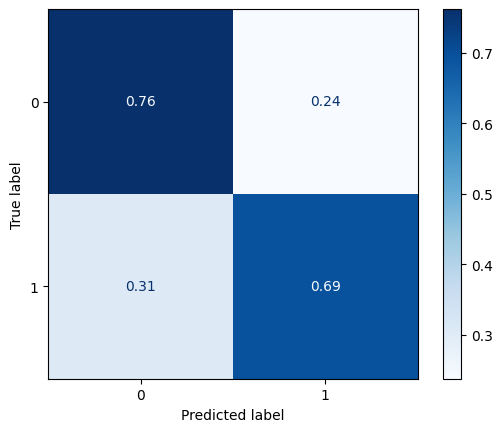

Test Evaluation
              precision    recall  f1-score   support

           0       0.63      0.33      0.43       269
           1       0.72      0.90      0.80       524

    accuracy                           0.71       793
   macro avg       0.68      0.61      0.62       793
weighted avg       0.69      0.71      0.68       793



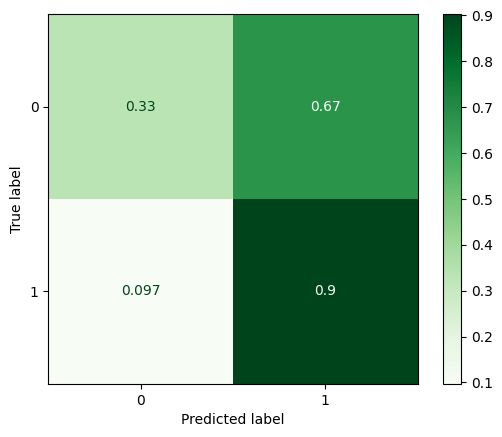

,train_acc,test_acc,train_prec,test_prec,train_recall,test_recall,train_f1,test_f1,train_auc,test_auc
log_reg_notune,0.728744,0.70744,0.741111,0.723242,0.694923,0.902672,0.717274,0.803056,0.796578,0.79429


In [20]:
# Create logistic regression model and run through classification metric function
lr = LogisticRegression(max_iter=1000, random_state=42)
log_reg = eval_classification(lr, X_train_proc, y_train, X_test_proc, y_test, model_name='log_reg_notune')
log_reg

Train Evaluation
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4679
           1       1.00      1.00      1.00      4589

    accuracy                           1.00      9268
   macro avg       1.00      1.00      1.00      9268
weighted avg       1.00      1.00      1.00      9268



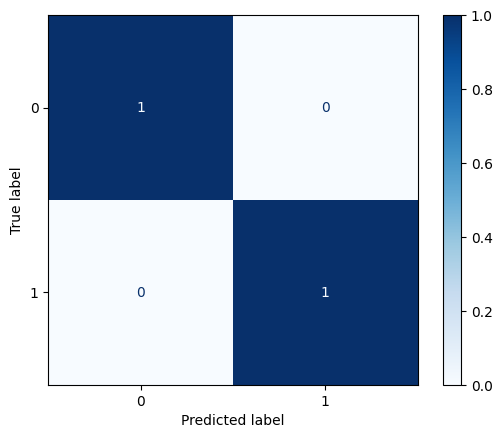

Test Evaluation
              precision    recall  f1-score   support

           0       0.50      0.51      0.50       269
           1       0.74      0.74      0.74       524

    accuracy                           0.66       793
   macro avg       0.62      0.62      0.62       793
weighted avg       0.66      0.66      0.66       793



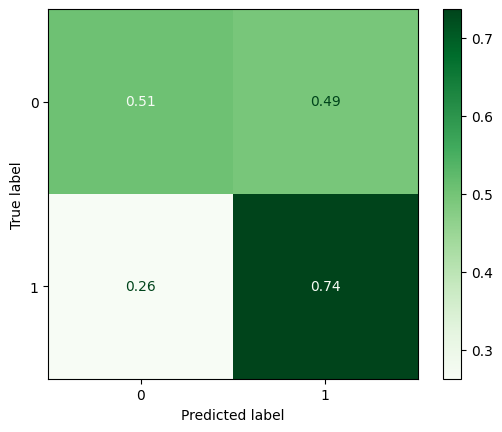

,train_acc,test_acc,train_prec,test_prec,train_recall,test_recall,train_f1,test_f1,train_auc,test_auc
log_reg_notune,0.728744,0.70744,0.741111,0.723242,0.694923,0.902672,0.717274,0.803056,0.796578,0.794290
dt_no_tune,1.000000,0.65826,1.000000,0.743738,1.000000,0.736641,1.000000,0.740173,1.000000,0.621109


In [21]:
# Make decision tree model and run through classification metric function
dt = DecisionTreeClassifier(random_state=42)
tree = eval_classification(dt, X_train_proc, y_train, X_test_proc, y_test, model_name= 'dt_no_tune', results_frame=log_reg)
tree

Train Evaluation
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4679
           1       1.00      1.00      1.00      4589

    accuracy                           1.00      9268
   macro avg       1.00      1.00      1.00      9268
weighted avg       1.00      1.00      1.00      9268



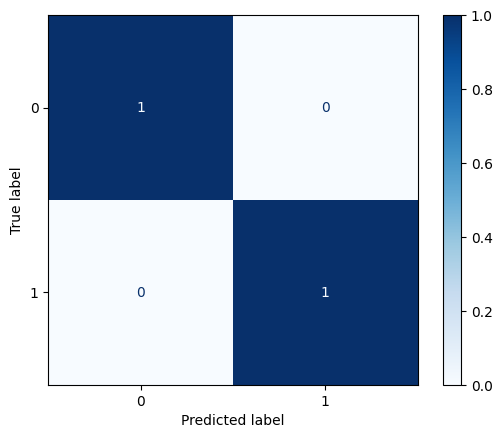

Test Evaluation
              precision    recall  f1-score   support

           0       0.60      0.62      0.61       269
           1       0.80      0.79      0.80       524

    accuracy                           0.73       793
   macro avg       0.70      0.70      0.70       793
weighted avg       0.73      0.73      0.73       793



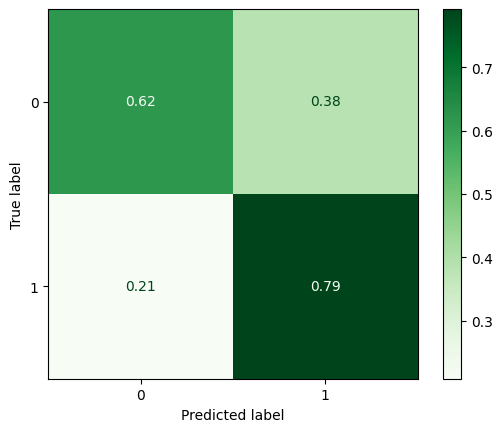

,train_acc,test_acc,train_prec,test_prec,train_recall,test_recall,train_f1,test_f1,train_auc,test_auc
log_reg_notune,0.728744,0.707440,0.741111,0.723242,0.694923,0.902672,0.717274,0.803056,0.796578,0.794290
dt_no_tune,1.000000,0.658260,1.000000,0.743738,1.000000,0.736641,1.000000,0.740173,1.000000,0.621109
rf_no_tune,1.000000,0.732661,1.000000,0.801158,1.000000,0.791985,1.000000,0.796545,1.000000,0.792999


In [22]:
# Create random forest model and run through classification metric function
rf = RandomForestClassifier(random_state=42)
forest = eval_classification(rf, X_train_proc, y_train, X_test_proc, y_test, model_name="rf_no_tune", results_frame=tree)
forest

**Tune the random forest model to see if I can get less overfitting**

In [23]:
# create estimators variable
estimators =  rf.estimators_

# check that it correctly shows for first tree
estimators[0]

DecisionTreeClassifier(max_features='sqrt', random_state=1608637542)

In [24]:
# Check for the maximum depth across all the trees
depths = [est.get_depth() for est in estimators]
max(depths)

59

In [25]:
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [26]:
# Make pipeline for GridSearch
rf_pipe = make_pipeline(rf)

# Take a look at parameters
rf_pipe.get_params()

{'memory': None,
 'steps': [('randomforestclassifier',
   RandomForestClassifier(random_state=42))],
 'transform_input': None,
 'verbose': False,
 'randomforestclassifier': RandomForestClassifier(random_state=42),
 'randomforestclassifier__bootstrap': True,
 'randomforestclassifier__ccp_alpha': 0.0,
 'randomforestclassifier__class_weight': None,
 'randomforestclassifier__criterion': 'gini',
 'randomforestclassifier__max_depth': None,
 'randomforestclassifier__max_features': 'sqrt',
 'randomforestclassifier__max_leaf_nodes': None,
 'randomforestclassifier__max_samples': None,
 'randomforestclassifier__min_impurity_decrease': 0.0,
 'randomforestclassifier__min_samples_leaf': 1,
 'randomforestclassifier__min_samples_split': 2,
 'randomforestclassifier__min_weight_fraction_leaf': 0.0,
 'randomforestclassifier__monotonic_cst': None,
 'randomforestclassifier__n_estimators': 100,
 'randomforestclassifier__n_jobs': None,
 'randomforestclassifier__oob_score': False,
 'randomforestclassifier__ra

In [27]:
# Create params to tune
params = {'randomforestclassifier__max_depth' : range(1, 56, 5)}

# Run grid search
rf_gs = GridSearchCV(rf_pipe, param_grid=params, n_jobs =-1, cv=3, verbose =1, scoring = 'roc_auc').fit(X_train_proc, y_train)

Fitting 3 folds for each of 11 candidates, totalling 33 fits


In [28]:
# check for best depth
print(f'RF Best depth - {rf_gs.best_params_}')

# make model with best depth
rf_best_depth = rf_gs.best_estimator_

RF Best depth - {'randomforestclassifier__max_depth': 6}


Train Evaluation
              precision    recall  f1-score   support

           0       0.71      0.80      0.76      4679
           1       0.77      0.67      0.72      4589

    accuracy                           0.74      9268
   macro avg       0.74      0.74      0.74      9268
weighted avg       0.74      0.74      0.74      9268



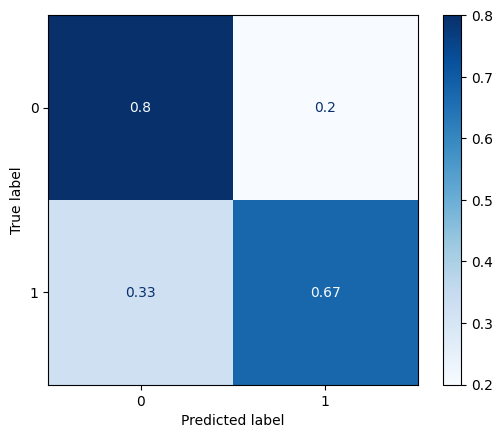

Test Evaluation
              precision    recall  f1-score   support

           0       0.59      0.64      0.61       269
           1       0.81      0.77      0.79       524

    accuracy                           0.73       793
   macro avg       0.70      0.71      0.70       793
weighted avg       0.73      0.73      0.73       793



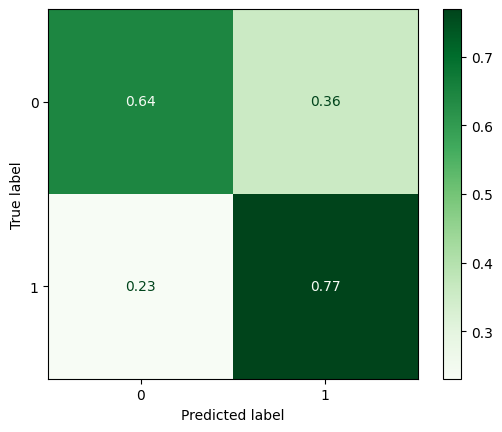

,train_acc,test_acc,train_prec,test_prec,train_recall,test_recall,train_f1,test_f1,train_auc,test_auc
log_reg_notune,0.728744,0.707440,0.741111,0.723242,0.694923,0.902672,0.717274,0.803056,0.796578,0.794290
dt_no_tune,1.000000,0.658260,1.000000,0.743738,1.000000,0.736641,1.000000,0.740173,1.000000,0.621109
rf_no_tune,1.000000,0.732661,1.000000,0.801158,1.000000,0.791985,1.000000,0.796545,1.000000,0.792999
RF depth tuned,0.738023,0.726356,0.768048,0.807615,0.674657,0.769084,0.718329,0.787879,0.816278,0.786504


In [29]:
# Rn best depth model through classification metrics function
rf_tuned = eval_classification(rf_best_depth, X_train_proc, y_train, X_test_proc, y_test, model_name='RF depth tuned', results_frame=forest)
rf_tuned

**Try XGB boost**

Train Evaluation
              precision    recall  f1-score   support

           0       0.72      0.82      0.77      4679
           1       0.79      0.67      0.72      4589

    accuracy                           0.75      9268
   macro avg       0.75      0.75      0.75      9268
weighted avg       0.75      0.75      0.75      9268



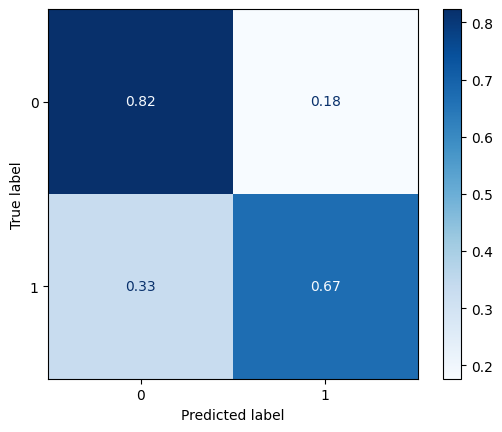

Test Evaluation
              precision    recall  f1-score   support

           0       0.63      0.57      0.60       269
           1       0.79      0.83      0.81       524

    accuracy                           0.74       793
   macro avg       0.71      0.70      0.70       793
weighted avg       0.74      0.74      0.74       793



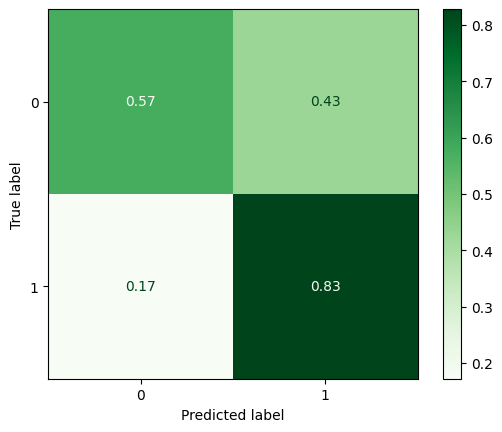

,train_acc,test_acc,train_prec,test_prec,train_recall,test_recall,train_f1,test_f1,train_auc,test_auc
log_reg_notune,0.728744,0.707440,0.741111,0.723242,0.694923,0.902672,0.717274,0.803056,0.796578,0.794290
dt_no_tune,1.000000,0.658260,1.000000,0.743738,1.000000,0.736641,1.000000,0.740173,1.000000,0.621109
rf_no_tune,1.000000,0.732661,1.000000,0.801158,1.000000,0.791985,1.000000,0.796545,1.000000,0.792999
RF depth tuned,0.738023,0.726356,0.768048,0.807615,0.674657,0.769084,0.718329,0.787879,0.816278,0.786504
xgboost,0.747842,0.741488,0.788274,0.790528,0.670952,0.828244,0.724897,0.808947,0.827917,0.801569


In [30]:
# Create XGB model
boosted = xgb.XGBClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=3,
    random_state=42,
    objective='binary:logistic')

# Run through classification metrics function
xgboost = eval_classification(boosted, X_train_proc, y_train, X_test_proc, y_test, model_name = 'xgboost', results_frame=rf_tuned)
xgboost

In [31]:
# Tune XG model through gridseacrh
xg_gs = GridSearchCV(boosted,{"max_depth": [2, 4, 6], "n_estimators": [50, 100, 200]},
        verbose=1,
        n_jobs=-1,
    ).fit(X_train_proc, y_train)

# Look at best score and best parameters frm grid search
print(xg_gs.best_score_)
print(xg_gs.best_params_)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
0.6504006739122714
{'max_depth': 2, 'n_estimators': 50}


Train Evaluation
              precision    recall  f1-score   support

           0       0.70      0.81      0.75      4679
           1       0.77      0.64      0.70      4589

    accuracy                           0.73      9268
   macro avg       0.74      0.73      0.73      9268
weighted avg       0.73      0.73      0.73      9268



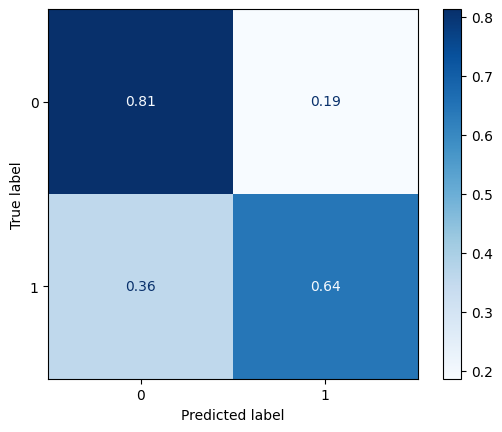

Test Evaluation
              precision    recall  f1-score   support

           0       0.61      0.62      0.62       269
           1       0.80      0.80      0.80       524

    accuracy                           0.74       793
   macro avg       0.71      0.71      0.71       793
weighted avg       0.74      0.74      0.74       793



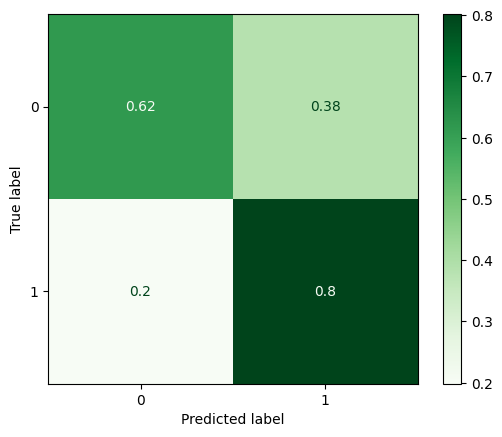

,train_acc,test_acc,train_prec,test_prec,train_recall,test_recall,train_f1,test_f1,train_auc,test_auc
log_reg_notune,0.728744,0.707440,0.741111,0.723242,0.694923,0.902672,0.717274,0.803056,0.796578,0.794290
dt_no_tune,1.000000,0.658260,1.000000,0.743738,1.000000,0.736641,1.000000,0.740173,1.000000,0.621109
rf_no_tune,1.000000,0.732661,1.000000,0.801158,1.000000,0.791985,1.000000,0.796545,1.000000,0.792999
RF depth tuned,0.738023,0.726356,0.768048,0.807615,0.674657,0.769084,0.718329,0.787879,0.816278,0.786504
xgboost,0.747842,0.741488,0.788274,0.790528,0.670952,0.828244,0.724897,0.808947,0.827917,0.801569
xg_tuned,0.728852,0.738966,0.771444,0.803059,0.642842,0.801527,0.701296,0.802292,0.798258,0.792237


In [32]:
# Create model with best parameters from grid search and run through classification metrics function
xg_tune = xg_gs.best_estimator_
boosted_tuned = eval_classification(xg_tune, X_train_proc, y_train, X_test_proc, y_test, model_name='xg_tuned', results_frame=xgboost)
boosted_tuned

**XG Boost untuned has the best metrics, will use this as MVP**

## Feature Importance Evaluation

Use SHAP values to determine which features had the highest importance to bodel

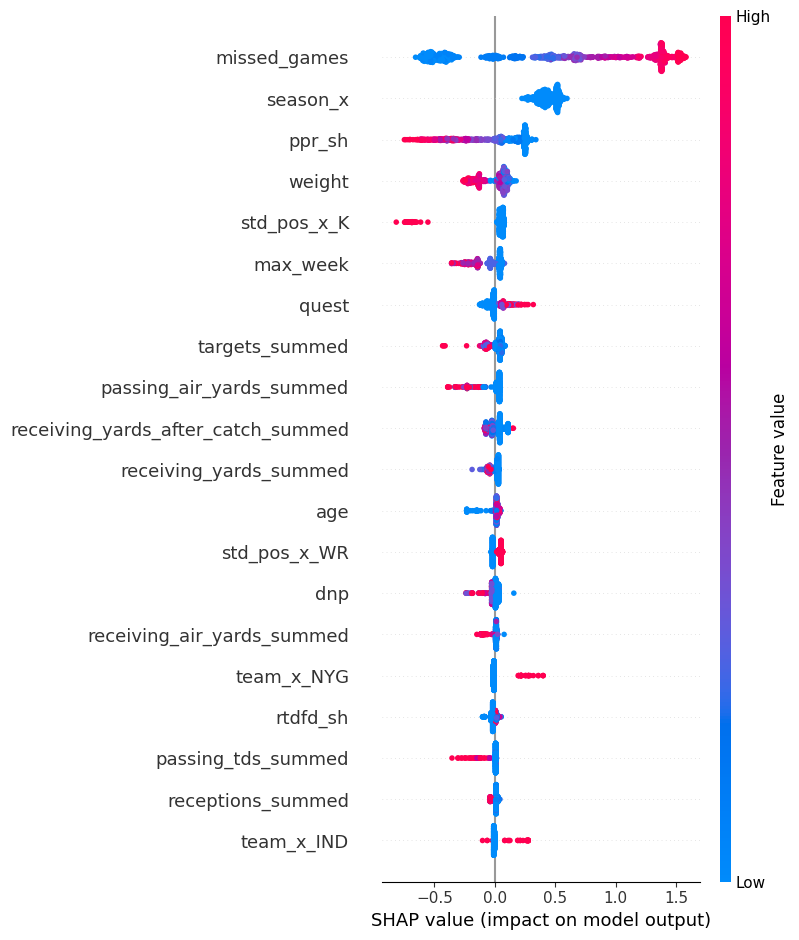

In [33]:
# Create SHAP object for calculation of importance
explainer = shap.Explainer(boosted)

# Calculate values of importance
shap_values = explainer(X_test_proc)

# Plot SHAP values in swarm plot
shap.summary_plot(shap_values, X_test_proc, feature_names = X_test_proc.columns)

<function matplotlib.pyplot.show(close=None, block=None)>

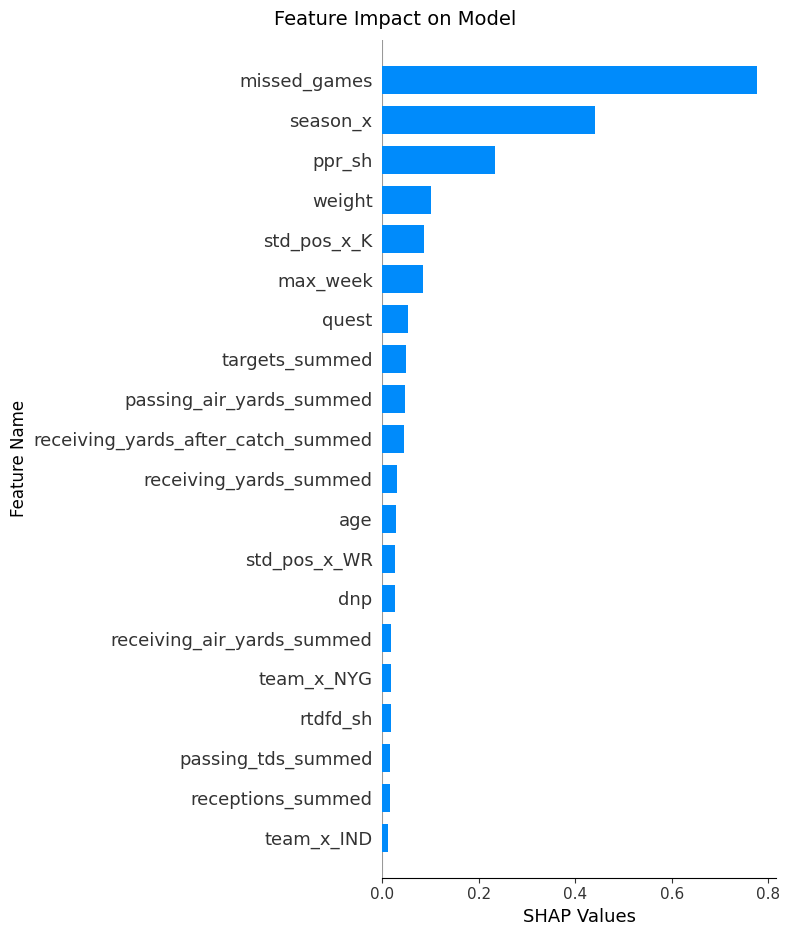

In [34]:
# Plot SHAP values in barplot
shap.summary_plot(shap_values, X_test_proc, feature_names = X_test_proc.columns, plot_type='bar', show=False)

# Edit title
plt.suptitle('Feature Impact on Model', fontsize = 14)

# Edit Xlabel
plt.xlabel('SHAP Values')

# Edit ylabel
plt.ylabel("Feature Name", fontsize= 12)

#Show plot
plt.tight_layout()
plt.show

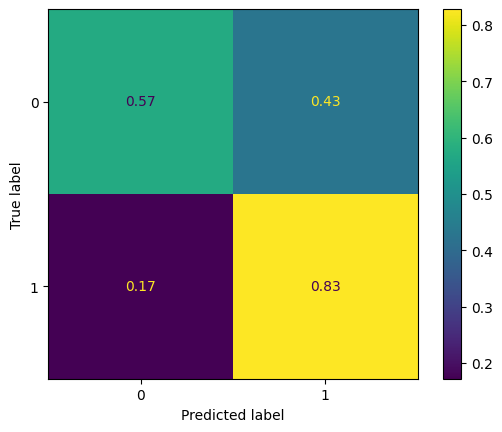

In [35]:
# Final confusion matrix for best model

ConfusionMatrixDisplay.from_estimator(boosted, X_test_proc, y_test, normalize='true')